# Example: Ensembles
--------------------

This example shows how to use atom's ensemble techniques to improve predictions on a dataset combining several models.

Import the breast cancer dataset from [sklearn.datasets](https://scikit-learn.org/stable/datasets/index.html#wine-dataset). This is a small and easy to train dataset whose goal is to predict whether a patient has breast cancer or not.

## Load the data

In [1]:
# Import packages
from sklearn.datasets import load_breast_cancer
from atom import ATOMClassifier

In [2]:
# Load the data
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

## Run the pipeline

In [3]:
# Initialize atom and train several models
atom = ATOMClassifier(X, y, holdout_size=0.2, verbose=2, random_state=1)
atom.run(models=["LR", "Tree", "LGB"], metric="accuracy")

<< ================== ATOM ================== >>

Configuration ==================== >>
Algorithm task: Binary classification.

Dataset stats ==================== >>
Shape: (456, 31)
Train set size: 343
Test set size: 113
Holdout set size: 113
-------------------------------------
Memory: 111.40 kB
Scaled: False
Outlier values: 124 (1.2%)


Training ========================= >>
Models: LR, Tree, LGB
Metric: accuracy


Results for LogisticRegression:
Fit ---------------------------------------------
Train evaluation --> accuracy: 0.9913
Test evaluation --> accuracy: 0.9823
Time elapsed: 0.422s
-------------------------------------------------
Time: 0.422s


Results for DecisionTree:
Fit ---------------------------------------------
Train evaluation --> accuracy: 1.0
Test evaluation --> accuracy: 0.9558
Time elapsed: 0.028s
-------------------------------------------------
Time: 0.028s


Results for LightGBM:
Fit ---------------------------------------------
Train evaluation --> accuracy

## Voting

In [4]:
# Combine the models into a Voting model
atom.voting(voting="soft")

Results for Voting:
Fit ---------------------------------------------
Train evaluation --> accuracy: 1.0
Test evaluation --> accuracy: 0.9735
Time elapsed: 0.228s


In [5]:
# Note that we now have an extra model in the pipeline
atom.models

['LR', 'Tree', 'LGB', 'Vote']

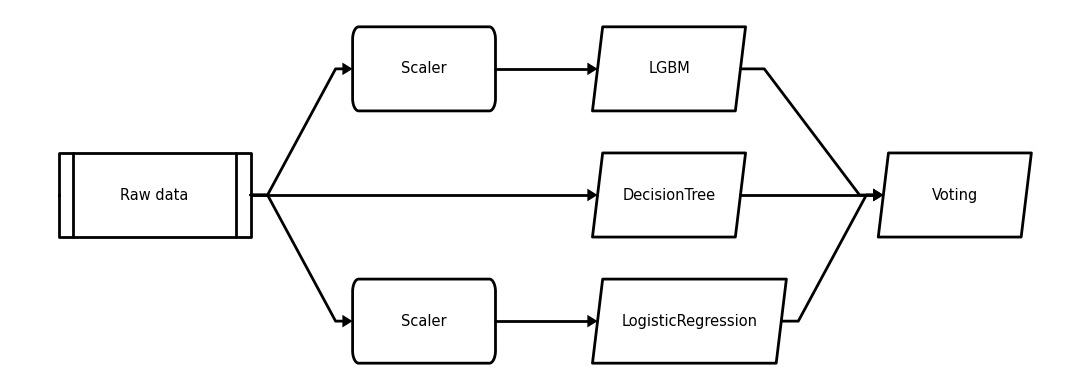

In [6]:
# The plot_pipeline method helps us visualize the ensemble
atom.plot_pipeline()

In [7]:
# We can use it like any other model to make predictions or plots
atom.vote.predict_proba("test")

0         1
343  0.000010  0.999990
344  0.999989  0.000011
345  0.999988  0.000012
346  0.000175  0.999825
347  0.001798  0.998202
..        ...       ...
451  0.997818  0.002182
452  0.010445  0.989555
453  0.999987  0.000013
454  0.000325  0.999675
455  0.999984  0.000016

[113 rows x 2 columns]

In [8]:
atom.vote.plot_threshold(metric=["auc", "recall", "accuracy"])

In [9]:
atom.plot_results(legend=None)

In [10]:
atom.delete("vote")

Deleting 1 models...
 --> Model Vote successfully deleted.


## Stacking

Just like Voting, we can create a Stacking mode. lUsing `train_on_test=True` trains the final estimator on the test set to avoid overfitting on the training set.

In [11]:
atom.stacking(final_estimator="LDA", train_on_test=True)

Results for Stacking:
Fit ---------------------------------------------
Train evaluation --> accuracy: 0.9942
Test evaluation --> accuracy: 0.9735
Time elapsed: 0.148s


In [12]:
# Now we use the holdout set to evaluate the performance of the Stack model
atom.stack.results

accuracy_train      0.994200
accuracy_test       0.973500
accuracy_holdout    0.982300
time_fit            0.148135
time                0.148135
Name: Stack, dtype: float64

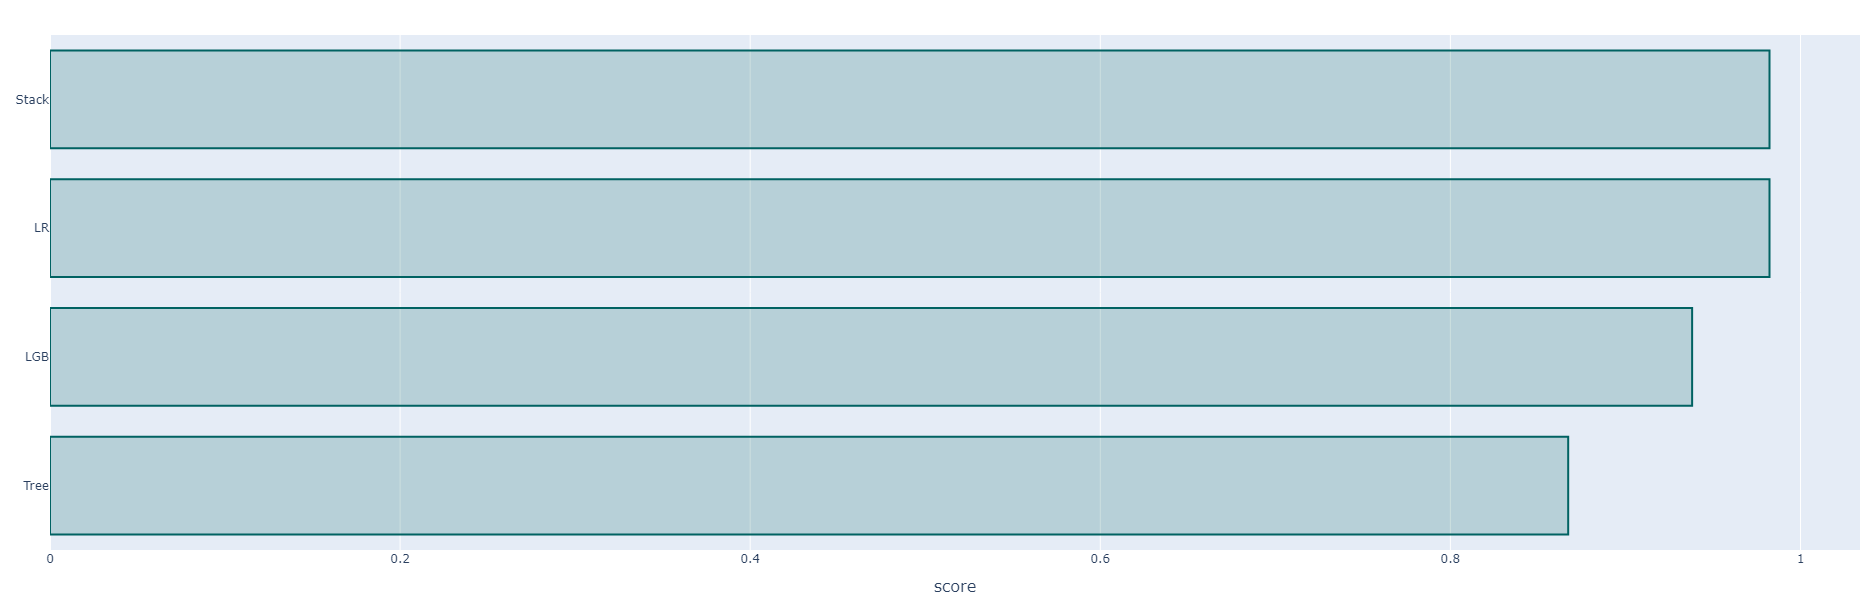

In [13]:
atom.plot_results(rows="holdout", legend=None)

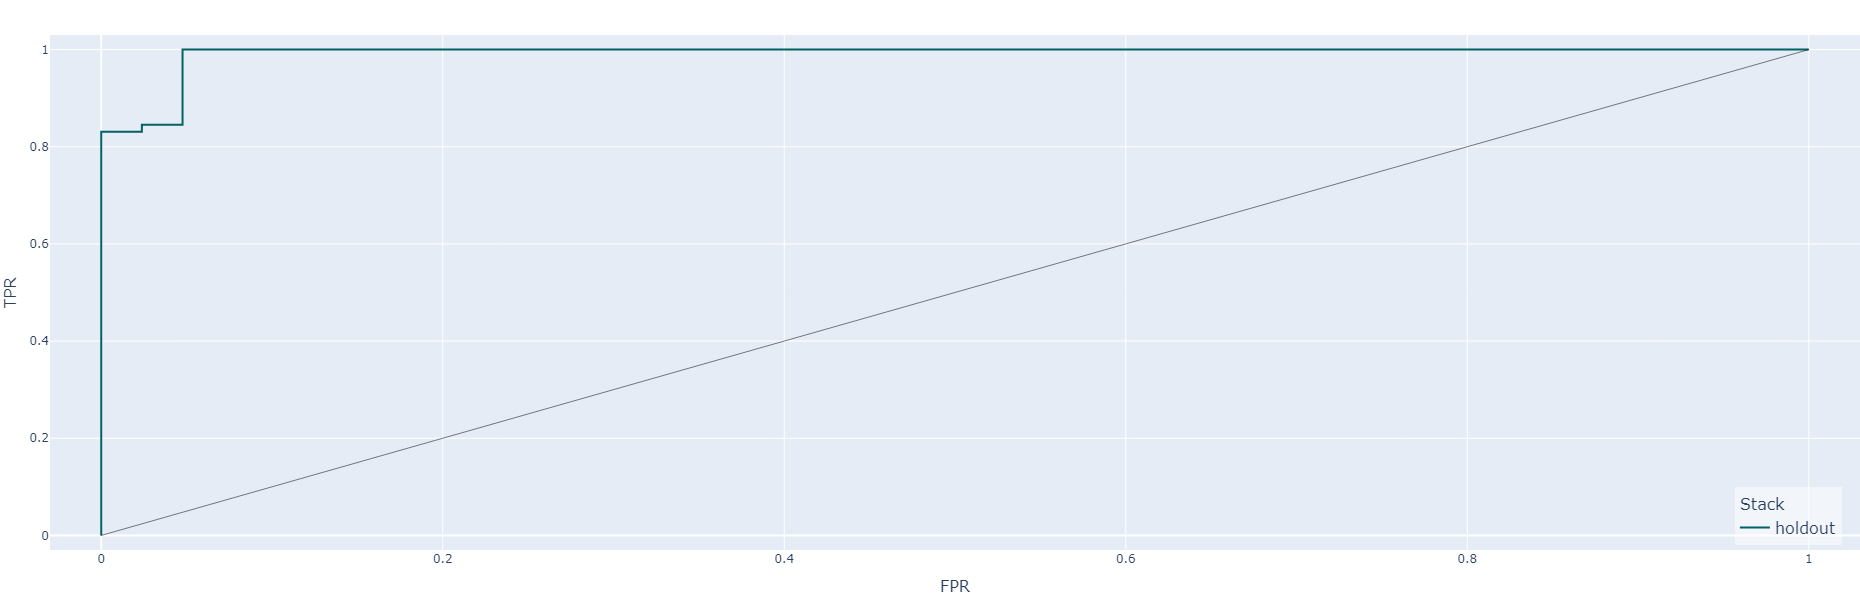

In [14]:
atom.stack.plot_roc(rows="holdout")

In [15]:
# Again, the model can be used for predictions or plots
atom.stack.predict(X)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

PermutationExplainer explainer: 114it [01:20,  1.29it/s]                                                                                                                                                                                                                                                             


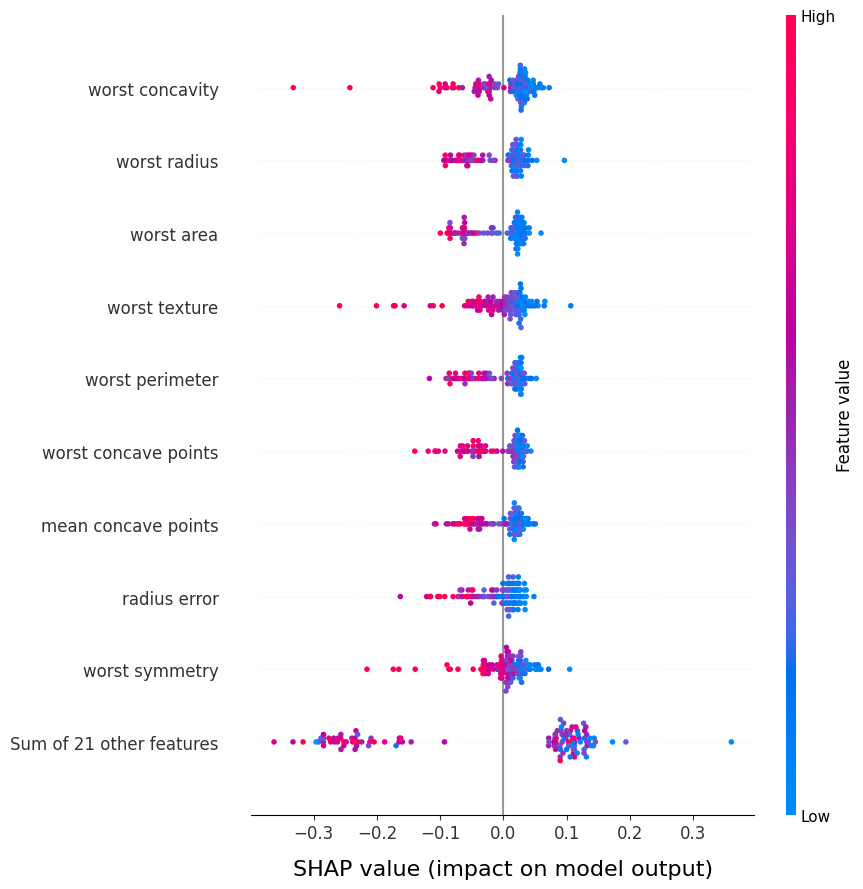

In [16]:
atom.stack.plot_shap_beeswarm(show=10)